In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data():
    """
    加载数据
    """
    with open('简单分类数据.txt') as fp:
        lines = fp.readlines()

    x = np.empty((len(lines), 2), dtype=float)
    y = np.empty(len(lines), dtype=float)

    for i in range(len(lines)):
        line = lines[i].strip().split('\t')
        x[i] = line[:2]
        y[i] = line[2]

    return x, y

In [3]:
def draw(x, y, w, b):
    """
    绘制图像
    """
    X = np.arange(x[:, 0].min(), x[:, 0].max(), 1)
    Y = np.empty([len(X)])
    for i in range(len(X)):
        Y[i] = (-w[0] * X[i] - b) / w[1]
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.plot(X, Y)
    plt.show()

In [4]:
x, y = load_data()
N, M = x.shape
w = np.ones(2)
b = 0.0

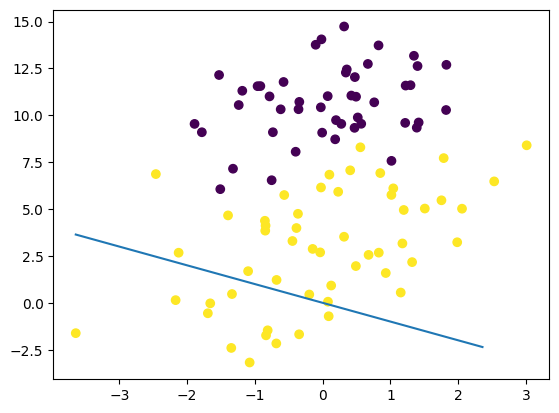

In [5]:
draw(x, y, w, b)

In [6]:
def predict(x, w, b):
    """
    预测方法
    """
    z = w.dot(x) + b
    return 1 / (1 + np.exp(-z))


predict(x[0], w, b)

0.999999197434851

In [7]:
def get_loss(N, x, y, w, b):
    """
    计算损失值
    """
    loss = 0
    for i in range(N):
        if y[i] == 1:
            # 当y是1时,predict(x[i])越大越好
            loss += np.log(predict(x[i], w, b))
        elif y[i] == -1:
            # 当y是-1时,1-predict(x[i])越大越好
            loss += np.log(1 - predict(x[i], w, b))
    return loss


get_loss(N, x, y, w, b)

-540.4081260783354

In [8]:
def gradient(N, x, y, w, b):
    """
    求梯度
    """
    upsilon = 1e-2  # 一个极小值,用于求导数
    # 得到损失
    l1 = get_loss(N, x, y, w, b)
    w[0] += upsilon
    l2 = get_loss(N, x, y, w, b)
    w[0] -= upsilon
    # loss(f(x + h)) - loss(f(x - h))
    gradient_w0 = (l2 - l1) / upsilon

    w[1] += upsilon
    l2 = get_loss(N, x, y, w, b)
    w[1] -= upsilon
    # loss(f(x + h)) - loss(f(x - h))
    gradient_w1 = (l2 - l1) / upsilon

    b += upsilon
    l2 = get_loss(N, x, y, w, b)
    b -= upsilon
    gradient_b = (l2 - l1) / upsilon
    # 返回梯度
    return np.array([gradient_w0, gradient_w1]), gradient_b

gradient(N, x, y, w, b)

(array([ -19.34439272, -510.07213195]), -33.286852351091056)

第 1 次训练的 loss 为 -16.194977093337176
第 11 次训练的 loss 为 -15.555428723949747
第 21 次训练的 loss 为 -14.880415871206095
第 31 次训练的 loss 为 -14.1348066285141
第 41 次训练的 loss 为 -13.2610945249049
第 51 次训练的 loss 为 -12.176841709569251
第 61 次训练的 loss 为 -10.90732758162659
第 71 次训练的 loss 为 -9.93295861863012
第 81 次训练的 loss 为 -9.561208091581662
第 91 次训练的 loss 为 -9.474096819874909


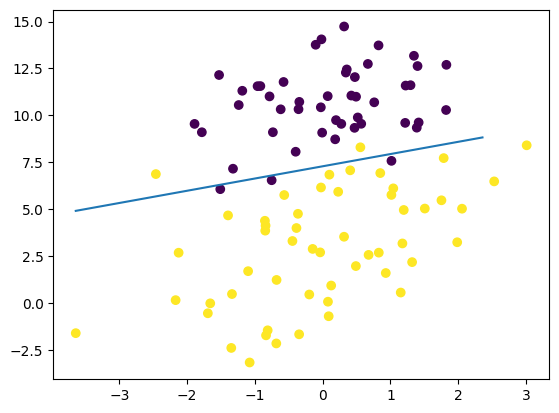

In [12]:
# 训练
for i in range(100):
    lr = 1e-2  # 学习率
    # 得到梯度
    g_w, g_b = gradient(N, x, y, w, b)
    # 更新值
    w += g_w * lr
    b += g_b * lr
    if i % 10 == 0:
        print(f'第 {i+1} 次训练的 loss 为 {get_loss(N, x, y, w, b)}')

draw(x, y, w, b)